<a href="https://colab.research.google.com/github/PrintfPeng/Allforone/blob/main/model1_Durian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# หลังจากนี้ไฟล์ใน Drive จะอยู่ที่ /content/drive/MyDrive/
# ตัวอย่าง: dataset อยู่ใน /MyDrive/DATASET
dataset_path = '/content/drive/MyDrive/DATASET.zip'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip -q "/content/drive/MyDrive/DATASET.zip" -d "/content/dataset"


In [5]:
!ls /content/dataset/DATASET/dataset/test/

ALGAL_LEAF_SPOT  HEALTHY_LEAF  LEAF_BLIGHT  PHOMOPSIS_LEAF_SPOT


In [6]:
!ls /content/dataset/DATASET/dataset/train/

ALGAL_LEAF_SPOT  HEALTHY_LEAF  LEAF_BLIGHT  PHOMOPSIS_LEAF_SPOT


In [7]:
class_names = {
    'ALGAL_LEAF_SPOT': 0,
    'ALLOCARIDARA_ATTACK': 1,
    'HEALTHY_LEAF': 2,
    'LEAF_BLIGHT': 3,
    'PHOMOPSIS_LEAF_SPOT': 4
}


In [8]:
import os

for dirpath, dirnames, filenames in os.walk("/content/dataset/DATASET/dataset/train"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 4 directories and 0 images in '/content/dataset/DATASET/dataset/train'.
there are 0 directories and 513 images in '/content/dataset/DATASET/dataset/train/ALGAL_LEAF_SPOT'.
there are 0 directories and 655 images in '/content/dataset/DATASET/dataset/train/LEAF_BLIGHT'.
there are 0 directories and 683 images in '/content/dataset/DATASET/dataset/train/HEALTHY_LEAF'.
there are 0 directories and 614 images in '/content/dataset/DATASET/dataset/train/PHOMOPSIS_LEAF_SPOT'.


In [9]:
import pathlib
import numpy as np

# กำหนด path ของโฟลเดอร์ที่เก็บภาพของแมว
data_dir = pathlib.Path("/content/dataset/DATASET/dataset/train/ALGAL_LEAF_SPOT")
data_dir = pathlib.Path("/content/dataset/DATASET/dataset/train/HEALTHY_LEAF")
data_dir = pathlib.Path("/content/dataset/DATASET/dataset/train/LEAF_BLIGHT")
data_dir = pathlib.Path("/content/dataset/DATASET/dataset/train/PHOMOPSIS_LEAF_SPOT")

for item in data_dir.glob("*"):
  print(item.name)

to_label_4470.jpg
to_label_4460.jpg
to_label_3790.jpg
to_label_3813.jpg
to_label_4310.jpg
to_label_4398.jpg
to_label_4210.jpg
to_label_3808.jpg
to_label_4444.jpg
to_label_4138.jpg
to_label_4494.jpg
to_label_4021.jpg
to_label_4119.jpg
to_label_3745.jpg
to_label_4216.jpg
to_label_3810.jpg
to_label_4209.jpg
to_label_4404.jpg
to_label_4349.jpg
to_label_4435.jpg
to_label_4111.jpg
to_label_3876.jpg
to_label_3998.jpg
to_label_4237.jpg
to_label_3868.jpg
to_label_4036.jpg
to_label_4330.jpg
to_label_4161.jpg
to_label_3981.jpg
to_label_3645.jpg
to_label_3987.jpg
to_label_4302.jpg
to_label_3869.jpg
to_label_3658.jpg
to_label_3789.jpg
to_label_3794.jpg
to_label_4083.jpg
to_label_3847.jpg
to_label_4027.jpg
to_label_4112.jpg
to_label_4140.jpg
to_label_3884.jpg
to_label_3728.jpg
to_label_3964.jpg
to_label_3650.jpg
to_label_4026.jpg
to_label_3632.jpg
to_label_4029.jpg
to_label_4221.jpg
to_label_4320.jpg
to_label_4491.jpg
to_label_3796.jpg
to_label_4488.jpg
to_label_4059.jpg
to_label_3750.jpg
to_label_3

In [10]:
# สร้างรายการไปยัง array
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['to_label_3623.jpg' 'to_label_3624.jpg' 'to_label_3626.jpg'
 'to_label_3627.jpg' 'to_label_3629.jpg' 'to_label_3631.jpg'
 'to_label_3632.jpg' 'to_label_3634.jpg' 'to_label_3635.jpg'
 'to_label_3636.jpg' 'to_label_3637.jpg' 'to_label_3638.jpg'
 'to_label_3639.jpg' 'to_label_3640.jpg' 'to_label_3641.jpg'
 'to_label_3642.jpg' 'to_label_3643.jpg' 'to_label_3644.jpg'
 'to_label_3645.jpg' 'to_label_3647.jpg' 'to_label_3649.jpg'
 'to_label_3650.jpg' 'to_label_3651.jpg' 'to_label_3655.jpg'
 'to_label_3657.jpg' 'to_label_3658.jpg' 'to_label_3659.jpg'
 'to_label_3660.jpg' 'to_label_3661.jpg' 'to_label_3663.jpg'
 'to_label_3664.jpg' 'to_label_3665.jpg' 'to_label_3666.jpg'
 'to_label_3668.jpg' 'to_label_3669.jpg' 'to_label_3670.jpg'
 'to_label_3671.jpg' 'to_label_3673.jpg' 'to_label_3674.jpg'
 'to_label_3675.jpg' 'to_label_3676.jpg' 'to_label_3679.jpg'
 'to_label_3680.jpg' 'to_label_3681.jpg' 'to_label_3682.jpg'
 'to_label_3684.jpg' 'to_label_3685.jpg' 'to_label_3687.jpg'
 'to_label_3691.jpg' 'to

Image shape: (224, 224, 3)


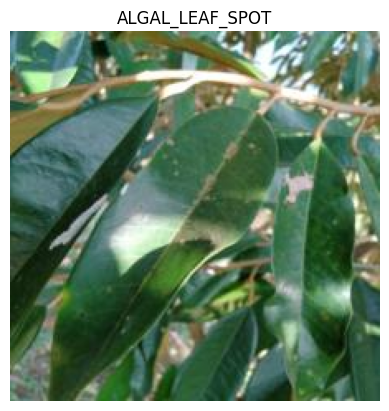

Image shape: (224, 224, 3)


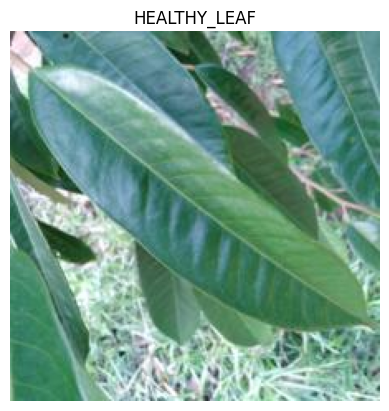

Image shape: (224, 224, 3)


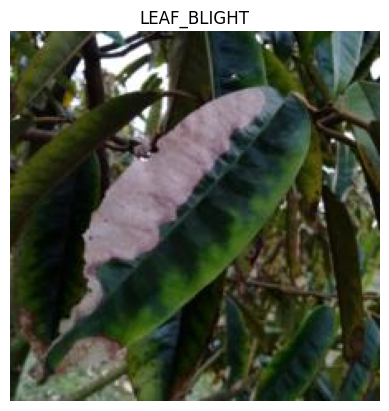

Image shape: (224, 224, 3)


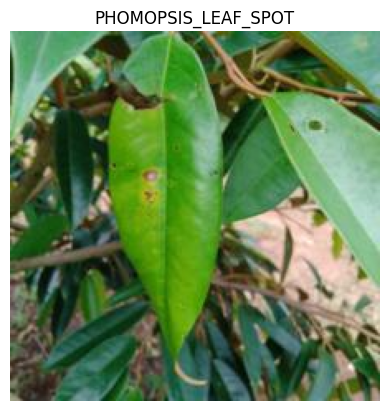

array([[[130, 191, 157],
        [111, 175, 138],
        [101, 165, 128],
        ...,
        [100, 166, 138],
        [103, 167, 141],
        [102, 164, 139]],

       [[139, 200, 166],
        [120, 182, 145],
        [105, 170, 130],
        ...,
        [101, 167, 139],
        [103, 167, 141],
        [102, 164, 139]],

       [[147, 207, 171],
        [127, 189, 152],
        [107, 172, 132],
        ...,
        [103, 169, 142],
        [104, 168, 144],
        [103, 165, 142]],

       ...,

       [[145, 149, 122],
        [141, 145, 118],
        [140, 142, 118],
        ...,
        [175, 152, 138],
        [172, 154, 144],
        [158, 141, 133]],

       [[155, 158, 131],
        [154, 157, 130],
        [153, 155, 131],
        ...,
        [171, 147, 135],
        [171, 152, 145],
        [159, 144, 137]],

       [[159, 162, 135],
        [156, 159, 132],
        [153, 153, 129],
        ...,
        [175, 153, 140],
        [177, 158, 152],
        [166, 151, 146]]], dtype=uint8)
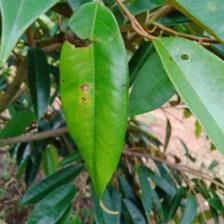

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    # สร้าง path ที่ถูกต้องโดยใช้ os.path.join
    target_folder = os.path.join(target_dir, target_class)

    # ตรวจสอบว่าโฟลเดอร์มีไฟล์รูปภาพหรือไม่
    if not os.path.exists(target_folder):
        print(f"Error: Directory '{target_folder}' does not exist.")
        return

    # ดึงไฟล์ทั้งหมดภายในโฟลเดอร์
    image_files = os.listdir(target_folder)

    if not image_files:
        print(f"No images found in '{target_folder}'")
        return

    # เลือกรูปภาพแบบสุ่มจากโฟลเดอร์
    random_image = random.choice(image_files)
    img_path = os.path.join(target_folder, random_image)

    # โหลดและแสดงรูปภาพ
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    plt.show()

    return img

# เรียกใช้งานฟังก์ชันโดยระบุ path และหมวดหมู่ เช่น "cats"
view_random_image("/content/dataset/DATASET/dataset/train", "ALGAL_LEAF_SPOT")
view_random_image("/content/dataset/DATASET/dataset/train", "HEALTHY_LEAF")
view_random_image("/content/dataset/DATASET/dataset/train", "LEAF_BLIGHT")
view_random_image("/content/dataset/DATASET/dataset/train", "PHOMOPSIS_LEAF_SPOT")

In [12]:
# 1 load images & pre-process
import tensorflow as tf  # Import TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

# preprocess data (normallise all pixel into form 0 to 1 by dividing the pixels with 255)
train_dataget = ImageDataGenerator(rescale=1./255)
valid_dataget = ImageDataGenerator(rescale=1./255)

In [13]:
# ตั้งค่าเส้นทางไปยังไดเรกทอรี่ของข้อมูล
train_dir = "/content/dataset/DATASET/dataset/train"
test_dir = "/content/dataset/DATASET/dataset/test"

In [14]:
# โอนข้อมูลโดยใช้เครื่องสร้างข้อมูล
train_data = train_dataget.flow_from_directory(train_dir,
                                            batch_size=32,  #ขนาดของกลุ่ม
                                            target_size=(224,224), #ขนาดของเป้าหมาย 224/224
                                            class_mode="categorical", # เปลี่ยนเป็น categorical
                                            seed=42)

valid_data = valid_dataget.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="categorical", # เปลี่ยนเป็น categorical
                                            seed=42)

Found 2465 images belonging to 4 classes.
Found 1157 images belonging to 4 classes.


In [15]:
import tensorflow as tf
from tensorflow import keras

model_1 = keras.models.Sequential([
    keras.Input(shape=(224,224,3)),  # กำหนด input ตรงนี้แทน
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4, activation="softmax")  # Changed to 4 classes
])

# Compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # ปรับ LR ให้เหมาะสม
    loss="categorical_crossentropy",  # ใช้ categorical_crossentropy สำหรับ > 2 คลาส
    metrics=["accuracy"]
)

In [16]:
# Compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # ปรับ LR ให้เหมาะสม
    loss="categorical_crossentropy",  # ใช้ categorical_crossentropy สำหรับ > 2 คลาส
    metrics=["accuracy"]
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)  # Stop training if validation loss doesn't improve for 3 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2) # Reduce learning rate when validation loss plateaus

history_1 = model_1.fit(
    train_data,
    epochs=5,  # ลองเพิ่ม epochs เป็น 20 แล้วให้ EarlyStopping หยุดเอง
    steps_per_epoch=len(train_data) // 2,  # ลดจำนวน step ลงเพื่อให้โมเดลเรียนรู้ได้พอดี
    validation_data=valid_data,
    validation_steps=len(valid_data) // 2,  # ลด validation step ถ้า dataset ใหญ่
    callbacks=[early_stop, reduce_lr]  # ใช้ Callbacks ป้องกัน Overfitting
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.2551 - loss: 1.3847 - val_accuracy: 0.2882 - val_loss: 1.3822 - learning_rate: 1.0000e-04
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2897 - loss: 1.3797 - val_accuracy: 0.4167 - val_loss: 1.3759 - learning_rate: 1.0000e-04
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.2631 - loss: 1.3807 - val_accuracy: 0.2934 - val_loss: 1.3704 - learning_rate: 1.0000e-04
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.2978 - loss: 1.3744 - val_accuracy: 0.4323 - val_loss: 1.3602 - learning_rate: 1.0000e-04
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.3001 - loss: 1.3731 - val_accuracy: 0.3646 - val_loss: 1.3565 - learning_rate: 1.0000e-04


In [18]:
print(type(class_names))
print(class_names)


<class 'numpy.ndarray'>
['to_label_3623.jpg' 'to_label_3624.jpg' 'to_label_3626.jpg'
 'to_label_3627.jpg' 'to_label_3629.jpg' 'to_label_3631.jpg'
 'to_label_3632.jpg' 'to_label_3634.jpg' 'to_label_3635.jpg'
 'to_label_3636.jpg' 'to_label_3637.jpg' 'to_label_3638.jpg'
 'to_label_3639.jpg' 'to_label_3640.jpg' 'to_label_3641.jpg'
 'to_label_3642.jpg' 'to_label_3643.jpg' 'to_label_3644.jpg'
 'to_label_3645.jpg' 'to_label_3647.jpg' 'to_label_3649.jpg'
 'to_label_3650.jpg' 'to_label_3651.jpg' 'to_label_3655.jpg'
 'to_label_3657.jpg' 'to_label_3658.jpg' 'to_label_3659.jpg'
 'to_label_3660.jpg' 'to_label_3661.jpg' 'to_label_3663.jpg'
 'to_label_3664.jpg' 'to_label_3665.jpg' 'to_label_3666.jpg'
 'to_label_3668.jpg' 'to_label_3669.jpg' 'to_label_3670.jpg'
 'to_label_3671.jpg' 'to_label_3673.jpg' 'to_label_3674.jpg'
 'to_label_3675.jpg' 'to_label_3676.jpg' 'to_label_3679.jpg'
 'to_label_3680.jpg' 'to_label_3681.jpg' 'to_label_3682.jpg'
 'to_label_3684.jpg' 'to_label_3685.jpg' 'to_label_3687.jpg'


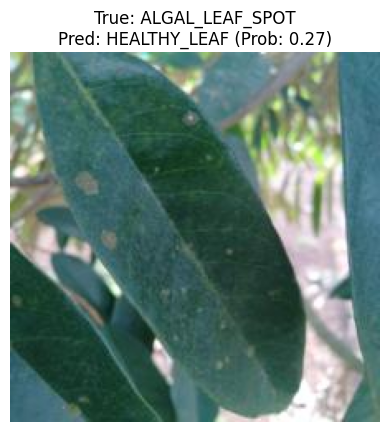

Class order used by model: ['ALGAL_LEAF_SPOT', 'ALLOCARIDARA_ATTACK', 'HEALTHY_LEAF', 'LEAF_BLIGHT']
All probabilities:
ALGAL_LEAF_SPOT        : 0.233
ALLOCARIDARA_ATTACK    : 0.263
HEALTHY_LEAF           : 0.272
LEAF_BLIGHT            : 0.232


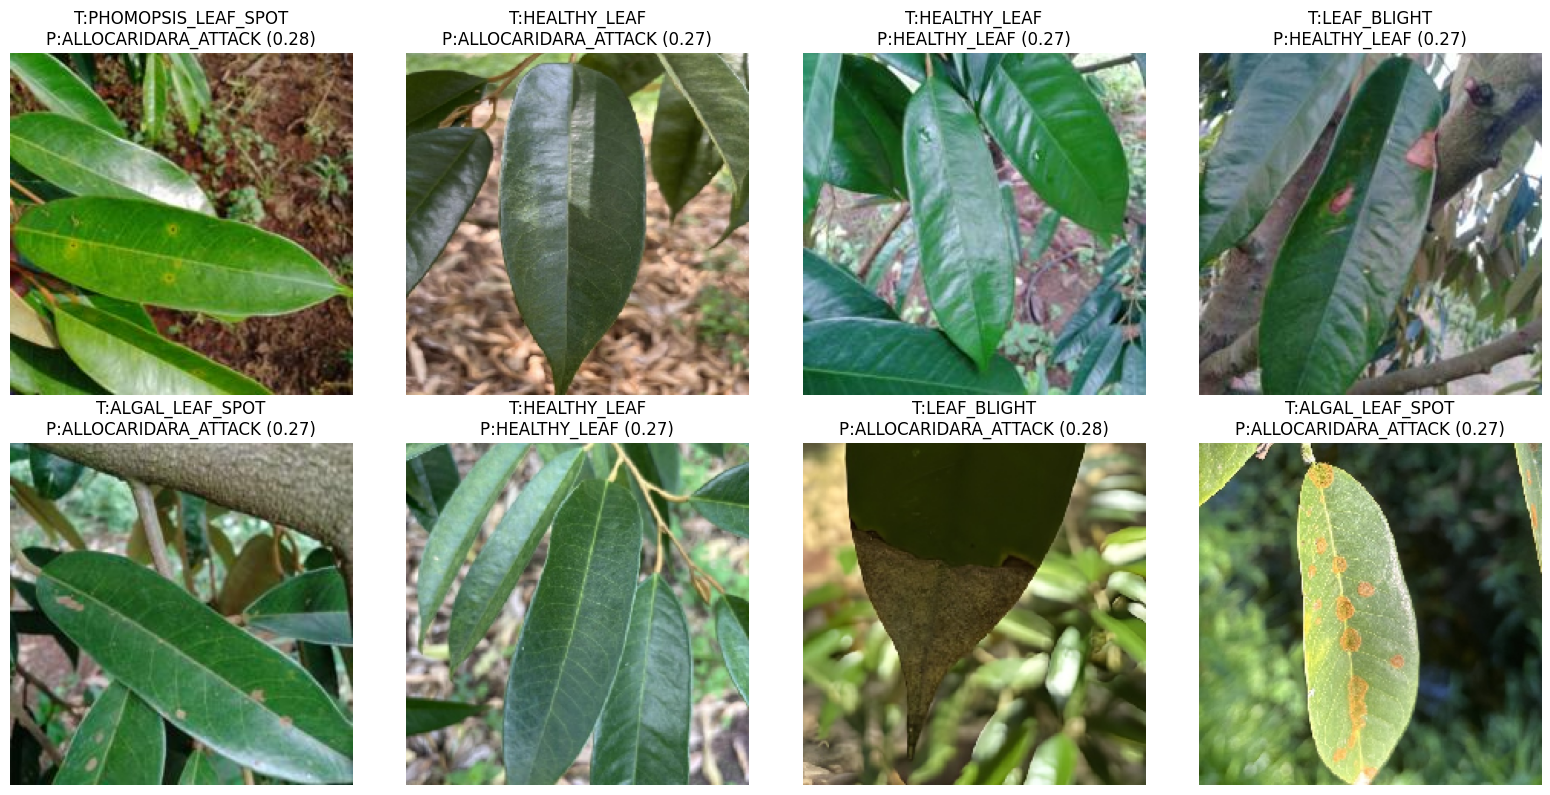

In [19]:
import os, random, numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ======= ตั้งค่า =======
# โฟลเดอร์ชุดทดสอบ (เปลี่ยนให้ตรงกับของคุณ)
DATA_DIR = "/content/dataset/DATASET/dataset/test"
# ขนาดภาพให้ "ตรงกับตอนเทรน"
TARGET_SIZE = (224, 224)   # ถ้าคุณเทรน 128x128 ก็เปลี่ยนเป็น (128,128)

# ถ้ามีตัวโหลดตอนเทรนอยู่แล้ว (เช่น train_data) ให้ใช้ mapping จากมันเสมอ:
# idx2name = {v:k for k,v in train_data.class_indices.items()}

# ถ้า "ไม่มี" train_data ให้ใช้ dict นี้แทน (ต้องตรงกับโฟลเดอร์ที่ใช้เทรนจริง)
class_names = {
    'ALGAL_LEAF_SPOT': 0,
    'ALLOCARIDARA_ATTACK': 1,
    'HEALTHY_LEAF': 2,
    'LEAF_BLIGHT': 3,
    'PHOMOPSIS_LEAF_SPOT': 4
}
idx2name = {v:k for k,v in class_names.items()}

# ฟังก์ชัน: สุ่ม path รูปจาก DATA_DIR
def random_image_path(root):
    # เลือกโฟลเดอร์คลาสแบบสุ่ม (ข้ามไฟล์ที่ไม่ใช่โฟลเดอร์)
    class_dirs = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
    cls = random.choice(sorted(class_dirs))
    cls_path = os.path.join(root, cls)
    # สุ่มไฟล์รูป (กรองเฉพาะสกุลที่ต้องการ)
    valid_ext = (".jpg", ".jpeg", ".png", ".bmp", ".webp")
    files = [f for f in os.listdir(cls_path) if f.lower().endswith(valid_ext)]
    if not files:
        raise RuntimeError(f"ไม่พบไฟล์รูปใน {cls_path}")
    img_name = random.choice(files)
    return os.path.join(cls_path, img_name), cls  # path และชื่อคลาสจริงจากโฟลเดอร์

# ฟังก์ชัน: พยากรณ์ 1 รูป
def predict_one(img_path):
    img = image.load_img(img_path, target_size=TARGET_SIZE)
    x = image.img_to_array(img)/255.0
    x = np.expand_dims(x, axis=0)
    probs = model_1.predict(x, verbose=0)        # shape = (1, num_classes)
    pred_idx = int(np.argmax(probs, axis=1)[0])
    pred_name = idx2name[pred_idx]
    pred_prob = float(np.max(probs))
    return img, pred_name, pred_prob, probs[0]

# ======= ทำนาย 1 รูปแบบสุ่ม =======
img_path, true_cls = random_image_path(DATA_DIR)
img, pred_name, pred_prob, all_probs = predict_one(img_path)

plt.imshow(img); plt.axis("off")
plt.title(f"True: {true_cls}\nPred: {pred_name} (Prob: {pred_prob:.2f})")
plt.show()

print("Class order used by model:", [idx2name[i] for i in range(len(all_probs))])
print("All probabilities:")
for i, p in enumerate(all_probs):
    print(f"{idx2name[i]:22s} : {p:.3f}")

# ======= (ทางเลือก) ทำนายหลายรูปทีละชุดและแสดงเป็นกริด =======
N = 8  # จำนวนรูปที่อยากสุ่มดู
cols = 4
rows = (N + cols - 1) // cols
plt.figure(figsize=(4*cols, 4*rows))
for i in range(N):
    img_path, true_cls = random_image_path(DATA_DIR)
    img, pred_name, pred_prob, _ = predict_one(img_path)
    plt.subplot(rows, cols, i+1)
    plt.imshow(img); plt.axis("off")
    plt.title(f"T:{true_cls}\nP:{pred_name} ({pred_prob:.2f})")
plt.tight_layout()
plt.show()
